# Kevin Trochez
# CS 4662 Machine Learning & Deep Learning
# Final Project : Chinese MNIST 
# 05/25/2025

In [ ]:
# !pip install opencv-python


In [ ]:
# !pip install opencv-python-headless


# Chinese MNIST Classification Using Machine Learning and Deep Learning

This notebook explores multiple algorithms to classify Chinese characters using the Chinese MNIST Dataset:
- CNN (Convolutional Neural Network) and DNN (Deep Neural Network)
- Dimensionality Reduction (PCA and Autoencoders)
- Restricted Boltzmann Machine (RBM) and Deep Belief Machine (DBM)
- LeNet-5
- VGG16 and VGG19

**Dataset:** [Chinese MNIST Dataset](https://www.kaggle.com/datasets/gpreda/chinese-mnist)

---


# Step 1 Import Required Libraries

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.applications import VGG16, VGG19

# Step 2 Load and Preprocess the Data

In [ ]:
# Define the path to the dataset
data_path = "C:/Users/Letak/School/cs4662AdvanceMachineLearning/Homework/cs4662Project/chinese_mnist/"
image_folder_path = "C:/Users/Letak/School/cs4662AdvanceMachineLearning/Homework/cs4662Project/chinese_mnist/data/"
# Load labels
labels_df = pd.read_csv(f"{data_path}/chinese_mnist.csv")

In [ ]:
# View the shape and first few rows
print(labels_df.shape)
print(labels_df.head())

(15000, 5)
   suite_id  sample_id  code  value character
0         1          1    10      9         九
1         1         10    10      9         九
2         1          2    10      9         九
3         1          3    10      9         九
4         1          4    10      9         九


In [ ]:
# Define function to load and preprocess images
def load_images(image_folder_path, labels_df):
    images = []
    labels = []
    for index, row in labels_df.iterrows():
        # Correct path with /Data included
        img_path = f"{image_folder_path}/input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg"
        
        # Check if the file exists before loading
        if not os.path.exists(img_path):
            print(f"File not found: {img_path}")
            continue
        
        # Read the image in grayscale mode
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Check if the image was loaded correctly
        if img is None:
            print(f"Error loading image: {img_path}")
            continue
        
        # Resize and normalize the image
        img = cv2.resize(img, (64, 64)) / 255.0
        images.append(img)
        labels.append(row['character'])
    
    return np.array(images), np.array(labels)


In [ ]:
# Test path for the first image
sample_img_path = f"{image_folder_path}/input_1_1_1.jpg"

if os.path.exists(sample_img_path):
    print(f"Sample image path is correct: {sample_img_path}")
else:
    print(f"File not found: {sample_img_path}")


Sample image path is correct: C:/Users/Letak/School/cs4662AdvanceMachineLearning/Homework/cs4662Project/chinese_mnist/data//input_1_1_1.jpg


In [ ]:
# Load images and labels again with the corrected path
X, y = load_images(image_folder_path, labels_df)

print(f"✅ Successfully loaded {len(X)} images.")


✅ Successfully loaded 15000 images.


In [ ]:
# Reshape X to add channel dimension (for CNN)
X = X.reshape(-1, 64, 64, 1)

In [ ]:
# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


In [ ]:
print(f"Shape of X training data: {X_train.shape}")
print(f"Shape of X testing data: {X_test.shape}")
print(f"Shape of y training data: {y_train.shape}")
print(f"Shape of y testing data: {y_test.shape}")

Shape of X training data: (12000, 64, 64, 1)
Shape of X testing data: (3000, 64, 64, 1)
Shape of y training data: (12000, 15)
Shape of y testing data: (3000, 15)


# Build and Train CNN Model

In [ ]:
# Build CNN Model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(y_categorical.shape[1], activation='softmax'))

C:\Users\Letak\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the CNN Model
history_cnn = cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3703 - loss: 2.0032 - val_accuracy: 0.8050 - val_loss: 0.6243
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7815 - loss: 0.6574 - val_accuracy: 0.8817 - val_loss: 0.3866
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8632 - loss: 0.4050 - val_accuracy: 0.9158 - val_loss: 0.2778
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8996 - loss: 0.2912 - val_accuracy: 0.9187 - val_loss: 0.2565
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9318 - loss: 0.2000 - val_accuracy: 0.9375 - val_loss: 0.1969
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9464 - loss: 0.1557 - val_accuracy: 0.9383 - val_loss: 0.2079
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9565 - loss: 0.1301 - val_accuracy: 0.9542 - val_loss: 0.1542
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9665 - loss: 0.1106 - val_accu

In [ ]:
# Evaluate CNN Model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f'CNN Model Accuracy: {cnn_acc:.2f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9433 - loss: 0.2127
CNN Model Accuracy: 0.95


# 94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9550 - loss: 0.1492
# CNN Model Accuracy: 0.96

# Apply PCA for Dimensionality Reduction

In [ ]:
# Reshape X for PCA
X_flattened = X.reshape(X.shape[0], -1)

In [ ]:
# Standardize data for PCA
scaler = StandardScaler()
X_flattened_scaled = scaler.fit_transform(X_flattened)


In [ ]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=100)  # Reduce to 100 components
X_pca = pca.fit_transform(X_flattened_scaled)


In [ ]:
# Split PCA data for training and testing
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)



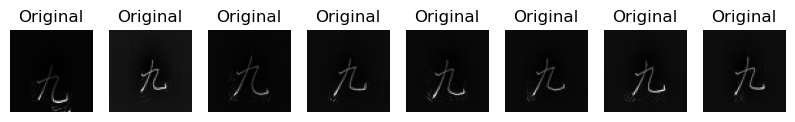

In [ ]:
# Plot original images
n = 8
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_flattened_scaled[i].reshape(64, 64), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.show()

# Build and Train DNN Model

In [ ]:
# Build DNN Model
dnn_model = Sequential()
dnn_model.add(Dense(256, input_shape=(X_train_pca.shape[1],), activation='relu'))
dnn_model.add(Dropout(0.3))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

C:\Users\Letak\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile DNN Model
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train DNN Model
history_dnn = dnn_model.fit(X_train_pca, y_train_pca, validation_split=0.2, epochs=10, batch_size=64, verbose=1)


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1926 - loss: 3.0513 - val_accuracy: 0.4521 - val_loss: 1.8884
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4072 - loss: 1.9411 - val_accuracy: 0.5392 - val_loss: 1.5685
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4800 - loss: 1.6540 - val_accuracy: 0.5967 - val_loss: 1.3813
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5452 - loss: 1.4504 - val_accuracy: 0.6513 - val_loss: 1.2098
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5874 - loss: 1.2826 - val_accuracy: 0.6829 - val_loss: 1.0865
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6147 - loss: 1.1747 - val_accuracy: 0.7050 - val_loss: 1.0155
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6355 - loss: 1.1128 - val_accuracy: 0.7021 - val_loss: 1.0098
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - loss: 1.0032 - val_accuracy: 0.

In [ ]:
# Evaluate DNN Model
dnn_loss, dnn_acc = dnn_model.evaluate(X_test_pca, y_test_pca)
print(f'DNN Model Accuracy: {dnn_acc:.2f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.9403
DNN Model Accuracy: 0.74


# Build and Train Autoencoder 

In [ ]:
# Define Autoencoder architecture
input_img = Input(shape=(4096,))
# Add Batch Normalization after Dense layers
encoded = Dense(1024, activation='relu')(input_img)
encoded = BatchNormalization()(encoded)  # Batch Norm after dense
encoded = Dense(512, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(256, activation='relu')(encoded)

# Decoder with Batch Normalization
decoded = Dense(512, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(1024, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4096, activation='sigmoid')(decoded)

In [ ]:
# Build Autoencoder
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
# Define early stopping to stop training if no improvement after 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Save history object when training autoencoder
history_autoencoder = autoencoder.fit(X_flattened_scaled, X_flattened_scaled,
                                      epochs=10, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 1.0314 - val_loss: 0.5044
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 1.0203 - val_loss: 0.4939
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 1.0159 - val_loss: 0.4849
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.9240 - val_loss: 0.4793
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.9918 - val_loss: 0.4782
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.9518 - val_loss: 0.4766
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 1.0164 - val_loss: 0.4744
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.9683 - val_loss: 0.4708
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.9481 - val_loss: 0.4700
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.8874 - val_loss: 0.4688


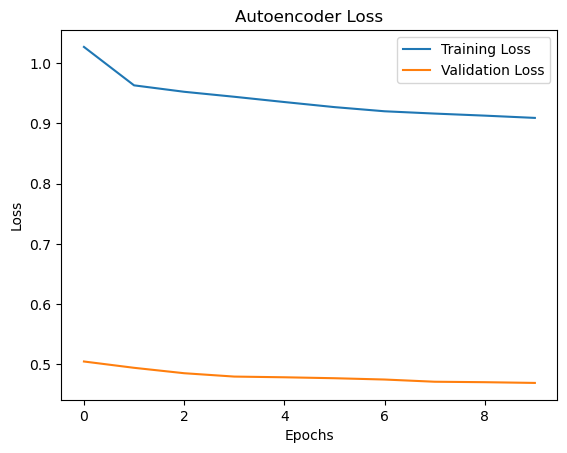

In [ ]:
# Plot training and validation loss
plt.plot(history_autoencoder.history['loss'], label='Training Loss')
plt.plot(history_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


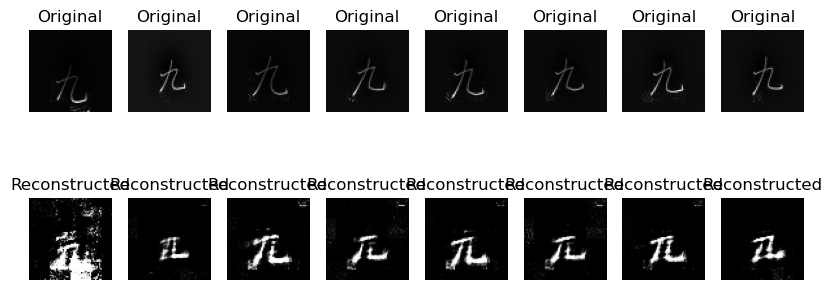

In [ ]:
# Predict reconstructed images
reconstructed_imgs = autoencoder.predict(X_flattened_scaled)

# Plot original and reconstructed images
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_flattened_scaled[i].reshape(64, 64), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_imgs[i].reshape(64, 64), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [ ]:
# Calculate mean squared error (MSE) for reconstruction quality


mse_scores = []
for i in range(len(X_flattened_scaled)):
    mse = mean_squared_error(X_flattened_scaled[i], reconstructed_imgs[i])
    mse_scores.append(mse)

print(f"Average MSE for Autoencoder: {np.mean(mse_scores):.4f}")


Average MSE for Autoencoder: 0.8226


In [ ]:
input_img_cnn = Input(shape=(64, 64, 1))  # Reshape images for CNN autoencoder

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_cnn)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder_cnn = Model(input_img_cnn, decoded)
autoencoder_cnn.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Reshape data before training
X_cnn = X.reshape(-1, 64, 64, 1)

In [ ]:
# Train CNN autoencoder
history_autoencoder_cnn = autoencoder_cnn.fit(X_cnn, X_cnn,
                                      epochs=3, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - loss: 0.0419 - val_loss: 0.0024
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.0032 - val_loss: 0.0024


Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.0032 - val_loss: 0.0024

Epoch 50/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8771 - val_loss: 0.4550

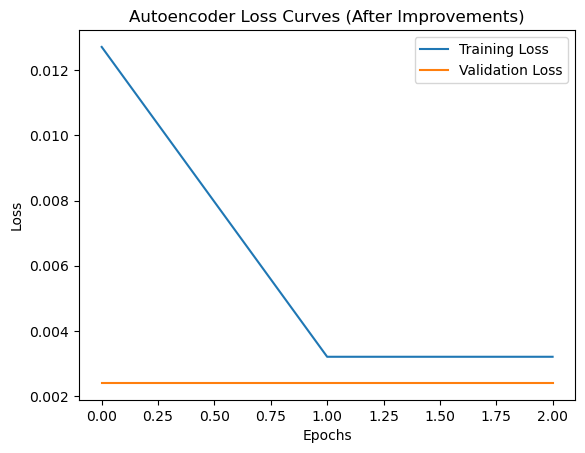

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history_autoencoder_cnn.history['loss'], label='Training Loss')
plt.plot(history_autoencoder_cnn.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss Curves (After Improvements)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Calculate RMSE for reconstructed images
rmse_scores = []
for i in range(len(X_cnn)):
    mse = mean_squared_error(X_cnn[i].reshape(-1), reconstructed_imgs[i].reshape(-1))
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

# Average RMSE
print(f"Average RMSE for CNN Autoencoder: {np.mean(rmse_scores):.4f}")

Average RMSE for CNN Autoencoder: 0.0527


# Average MSE for Autoencoder: 0.8104

# Train RBM + Logistic Regression

In [ ]:
# Define and train RBM model
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=10, random_state=42)

In [ ]:
# Fit RBM on training data
X_train_rbm = rbm.fit_transform(X_train_pca)
X_test_rbm = rbm.transform(X_test_pca)

In [ ]:
# Logistic Regression after RBM
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_rbm, y_train_pca)

LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate RBM + Logistic Regression
rbm_pred = logistic.predict(X_test_rbm)
print(classification_report(y_test_pca, rbm_pred))

              precision    recall  f1-score   support

           0       0.09      0.97      0.17       182
           1       0.00      0.00      0.00       201
           2       0.23      0.01      0.03       217
           3       0.00      0.00      0.00       198
           4       0.12      0.02      0.04       201
           5       0.00      0.00      0.00       206
           6       0.13      0.01      0.02       207
           7       0.19      0.07      0.10       198
           8       0.16      0.05      0.08       188
           9       0.17      0.03      0.05       203
          10       0.13      0.01      0.02       189
          11       0.18      0.02      0.03       221
          12       0.00      0.00      0.00       194
          13       0.16      0.02      0.04       209
          14       0.20      0.87      0.33       186

    accuracy                           0.13      3000
   macro avg       0.12      0.14      0.06      3000
weighted avg       0.12   

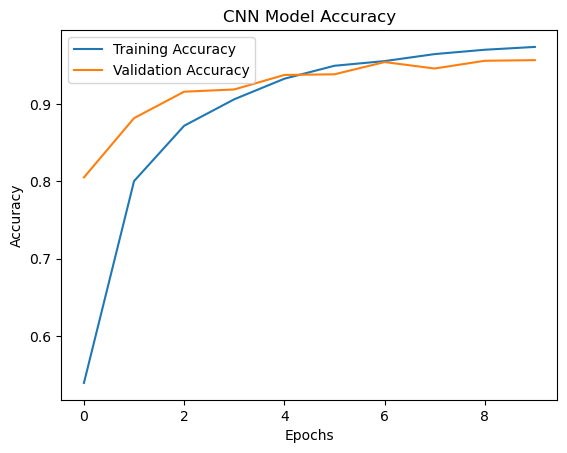

In [ ]:
# Plot CNN Accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

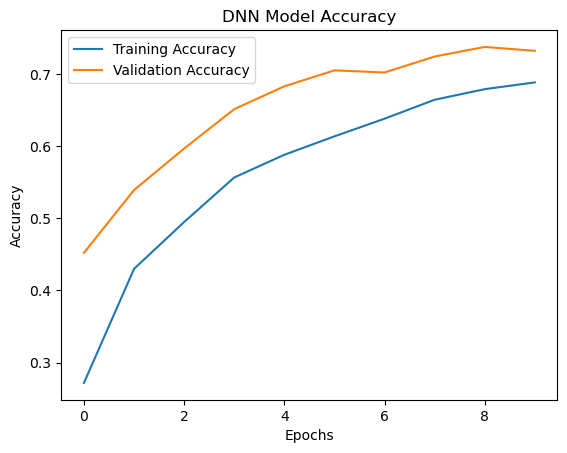

In [ ]:
# Plot DNN Accuracy
plt.plot(history_dnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

# Define LeNet-5 adapted for Chinese MNIST (60x60x1 input)
def build_lenet5(input_shape=(64, 64, 1), num_classes=15):  # Chinese MNIST has 15 classes
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape, padding='same'),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='tanh'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
K.clear_session()

In [ ]:
# Compile the model
lenet_model = build_lenet5()
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Letak\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Show the model summary
lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 32, 32, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 14, 14, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       376,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,451 (1.49 MB)

 Trainable params: 390,451 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Make sure your labels are one-hot encoded
y_train_cat = to_categorical(y_train, num_classes=15)
y_test_cat = to_categorical(y_test, num_classes=15)

In [ ]:
print(y_train.shape)
print(y_train[0])

(12000, 15)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Train LeNet-5
history_lenet = lenet_model.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=10, batch_size=64)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3628 - loss: 2.0030 - val_accuracy: 0.6177 - val_loss: 1.2608
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6766 - loss: 1.0851 - val_accuracy: 0.7253 - val_loss: 0.8893
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7748 - loss: 0.7274 - val_accuracy: 0.7967 - val_loss: 0.6605
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8342 - loss: 0.5334 - val_accuracy: 0.8363 - val_loss: 0.5323
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8807 - loss: 0.3944 - val_accuracy: 0.8590 - val_loss: 0.4392
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9118 - loss: 0.2982 - val_accuracy: 0.8830 - val_loss: 0.3651
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9361 - loss: 0.2251 - val_accuracy: 0.8880 - val_loss: 0.3376
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9480 - loss: 0.1779 - val_accu

In [ ]:
def build_vgg16_custom(input_shape=(64, 64, 1), num_classes=15):
    # VGG16 expects 3 channels, so we need to duplicate grayscale channel
    input_layer = Input(shape=input_shape)
    # Expand grayscale (1 channel) into 3 channels
    x = Conv2D(3, (1, 1), padding='same', activation='linear')(input_layer)  # (64, 64, 3)

    base_model = VGG16(include_top=False, input_tensor=x, weights=None)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model


In [ ]:
# VGG16
vgg16_model = build_vgg16_custom()
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train VGG16
history_vgg16 = vgg16_model.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=10, batch_size=64)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.0697 - loss: 2.7107 - val_accuracy: 0.0620 - val_loss: 2.7083
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.0723 - loss: 2.7079 - val_accuracy: 0.0627 - val_loss: 2.7086
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.0693 - loss: 2.7081 - val_accuracy: 0.0607 - val_loss: 2.7086
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.0632 - loss: 2.7083 - val_accuracy: 0.0607 - val_loss: 2.7088
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.0654 - loss: 2.7082 - val_accuracy: 0.0607 - val_loss: 2.7088
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.0634 - loss: 2.7084 - val_accuracy: 0.0607 - val_loss: 2.7088
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.0644 - loss: 2.7081 - val_accuracy: 0.0627 - val_loss: 2.7087
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.0644 - loss: 2.7079 - val_accu

In [ ]:
def build_vgg19_custom(input_shape=(64, 64, 1), num_classes=15):
    # VGG19 expects 3 channels too
    input_layer = Input(shape=input_shape)
    # Expand grayscale (1 channel) into 3 channels
    x = Conv2D(3, (1, 1), padding='same', activation='linear')(input_layer)  # (64, 64, 3)

    base_model = VGG19(include_top=False, input_tensor=x, weights=None)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model


In [ ]:
# VGG19
vgg19_model = build_vgg19_custom()
vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train VGG19
history_vgg19 = vgg19_model.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=10, batch_size=64)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.0674 - loss: 2.7098 - val_accuracy: 0.0607 - val_loss: 2.7083
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.0620 - loss: 2.7082 - val_accuracy: 0.0627 - val_loss: 2.7085
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.0685 - loss: 2.7081 - val_accuracy: 0.0607 - val_loss: 2.7087
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.0715 - loss: 2.7078 - val_accuracy: 0.0607 - val_loss: 2.7087
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.0695 - loss: 2.7081 - val_accuracy: 0.0607 - val_loss: 2.7088
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.0691 - loss: 2.7080 - val_accuracy: 0.0607 - val_loss: 2.7087
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.0682 - loss: 2.7080 - val_accuracy: 0.0620 - val_loss: 2.7087
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.0715 - loss: 2.7080 - val_accu

In [ ]:
# Example evaluation
lenet_score = lenet_model.evaluate(X_test, y_test)
vgg16_score = vgg16_model.evaluate(X_test, y_test)
vgg19_score = vgg19_model.evaluate(X_test, y_test)

print("LeNet-5 Test Accuracy:", lenet_score[1])
print("VGG16 Test Accuracy:", vgg16_score[1])
print("VGG19 Test Accuracy:", vgg19_score[1])


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9022 - loss: 0.2830
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 221ms/step - accuracy: 0.0605 - loss: 2.7088
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 286ms/step - accuracy: 0.0605 - loss: 2.7087
LeNet-5 Test Accuracy: 0.9086666703224182
VGG16 Test Accuracy: 0.06066666543483734
VGG19 Test Accuracy: 0.06066666543483734


In [ ]:

def visualize_predictions(model, X_data, y_data, label_encoder, title="Model"):
    preds = model.predict(X_data)
    pred_labels = np.argmax(preds, axis=1)
    true_labels = np.argmax(y_data, axis=1)

    n = 10
    plt.figure(figsize=(15, 2.5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(X_data[i].reshape(64, 64), cmap='gray')
        pred = label_encoder.inverse_transform([pred_labels[i]])[0]
        true = label_encoder.inverse_transform([true_labels[i]])[0]
        plt.title(f"P:{pred}\nT:{true}")
        plt.axis('off')
    plt.suptitle(title + " Predictions", fontsize=14)
    plt.tight_layout()
    plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


C:\Users\Letak\AppData\Local\Temp\ipykernel_37104\429542919.py:16: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  plt.tight_layout()
C:\Users\Letak\AppData\Local\Temp\ipykernel_37104\429542919.py:16: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from current font.
  plt.tight_layout()
C:\Users\Letak\AppData\Local\Temp\ipykernel_37104\429542919.py:16: UserWarning: Glyph 38646 (\N{CJK UNIFIED IDEOGRAPH-96F6}) missing from current font.
  plt.tight_layout()
C:\Users\Letak\AppData\Local\Temp\ipykernel_37104\429542919.py:16: UserWarning: Glyph 19971 (\N{CJK UNIFIED IDEOGRAPH-4E03}) missing from current font.
  plt.tight_layout()
C:\Users\Letak\AppData\Local\Temp\ipykernel_37104\429542919.py:16: UserWarning: Glyph 20061 (\N{CJK UNIFIED IDEOGRAPH-4E5D}) missing from current font.
  plt.tight_layout()
C:\Users\Letak\AppData\Local\Temp\ipykernel_37104\429542919.py:16: UserWarning: Glyph 20159 (\N{CJK UNIFIED IDEOGRAPH-4EBF}) missing fr

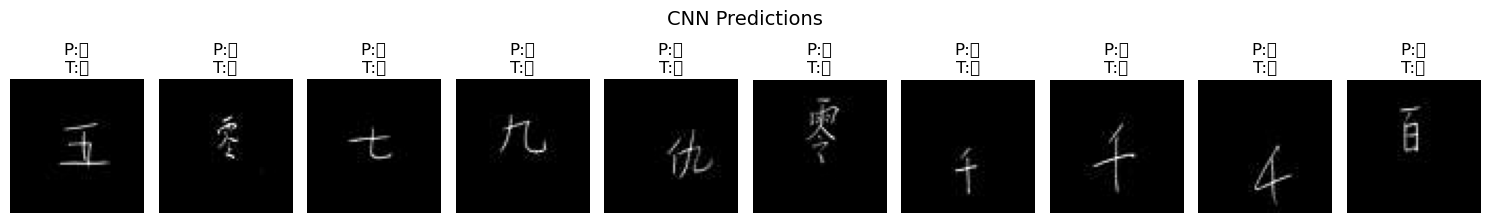

In [ ]:
visualize_predictions(cnn_model, X_test, y_test, label_encoder, title="CNN")

In [ ]:
visualize_predictions(vgg16_model, X_test, y_test, label_encoder, title="VGG16")

63/94 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step

In [ ]:
visualize_predictions(vgg19_model, X_test, y_test, label_encoder, title="VGG19")

In [ ]:
visualize_predictions(lenet_model, X_test, y_test, label_encoder, title="LeNet-5")